# PyCaret - Análise do Framework

O Framework **PyCaret** oferece várias opções para aprendizado de máquina (Machine Learning). Ele segue o seguinte padrão, tipicamente: **Setup** > **Compare Models** > **Analyze Model** > **Prediction** > **Save Model**.

Na parte do **Setup**, nós inicializamos o módulo que vamos utilizar e fazemos o setup passando duas informações importantes: os dados que estamos usando para treinar o nosso modelo e o nosso alvo.

Nesse notebook, será mostrado o módulo de Classificação do PyCaret. No exercício 04, você encontrará uma aplicação do módulo de Regressão do PyCaret. No final desse notebook, será feito algumas considerações em cima do PyCaret sobre suas vantagens e desvantagens.

### Importando as bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pycaret
import seaborn as sns
sns.set()

### Definindo funções para tratar os dados

In [2]:
def get_train_data() -> pd.DataFrame:
    # Faz a leitura dos nossos dados.
    df = pd.read_csv("./data/titanic/train.csv")
    
    # Remove parâmetros que não serão úteis 
    # em nossa análise.
    df.drop(["Name", "Ticket", "Fare", "Cabin", 
             "Embarked", "PassengerId", "SibSp"], 
            axis="columns", inplace=True)
    
    # A maioria dos modelos de Machine Learning
    # trabalham melhor com números, em vez de texto.
    # Além disso, a maioria identifica números maiores
    # como melhores para a previsão.
    
    # Para tratar essas duas coisas, vamos usar uma 
    # função do pandas: get_dummies.
    df = pd.get_dummies(df, columns=["Sex", "Pclass"])
    
    # Como é redundante manter a coluna Sex_male
    # e uma das colunas de classe social,
    # vamos removê-las.
    df.drop(["Sex_male", "Pclass_3"], 
            axis="columns", 
            inplace=True)
    
    return df

def get_test_data() -> pd.DataFrame:
    # Faz a leitura dos nossos dados de teste
    # para fazer a submissão no Kaggle.
    df = pd.read_csv("./data/titanic/test.csv")
    
    # Apenas repetimos o que fizemos acima
    df = pd.get_dummies(df, columns=["Sex", "Pclass"])
    df.drop(["Sex_male", "Pclass_3"], 
            axis="columns", 
            inplace=True)
    
    return df

### Pegando os dados de treino e de teste

In [3]:
train_data = get_train_data()
test_data = get_test_data()

In [4]:
train_data.head(len(train_data))

,Survived,Age,Parch,Sex_female,Pclass_1,Pclass_2
0,0,22.0,0,0,0,0
1,1,38.0,0,1,1,0
2,1,26.0,0,1,0,0
3,1,35.0,0,1,1,0
4,0,35.0,0,0,0,0
...,...,...,...,...,...,...
886,0,27.0,0,0,0,1
887,1,19.0,0,1,1,0
888,0,NaN,2,1,0,0
889,1,26.0,0,0,1,0


### Inicializando o módulo de Classificação do PyCaret

In [5]:
# Nós importamos todas as funções do módulo de Classificação.
from pycaret.classification import *

In [6]:
# Inicializando o módulo, passando 70% dos nosso dados
# como dados de treinamento e 30% para validação.
setup(train_data, target='Survived', session_id=888, train_size=0.7)

# Note que o PyCaret automaticamente trata as linhas
# que possuem valores faltando. Por padrão, se é uma coluna
# numérica, ele pega a média, senão ele pega a moda.

# Em Fold Number nós podemos ver o número de validações
# cruzadas que o PyCaret tem como padrão.

# Todos esses parâmetros são editáveis.

,Description,Value
0,Session id,888
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 6)"
4,Transformed data shape,"(891, 6)"
5,Transformed train set shape,"(623, 6)"
6,Transformed test set shape,"(268, 6)"
7,Numeric features,5
8,Rows with missing values,19.9%
9,Preprocess,True


### Treinando modelos

In [7]:
# Essa é a maior vantagem do PyCaret, a função
# compare_models compara todos os modelos
# possíveis e retorna o melhor para esse
# conjunto de dados.
best = compare_models()

# É possível editar qual parâmetro você quer usar
# para classificar o melhor modelo. 

# Também é possível retornar os 3 melhores modelos
# ou mais, em vez de apenas retornar o melhor.

# Isso é muito útil, pois o PyCaret possui uma função
# que funde modelos para retornar um que, possivelmente,
# performa melhor naquele cojunto de dados.
# No entanto, ela não será necessária aqui.

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8203,0.8443,0.7536,0.7758,0.7605,0.6173,0.6218,0.0590
dt,Decision Tree Classifier,0.8138,0.7819,0.7071,0.7864,0.7441,0.5984,0.6010,0.0230
lr,Logistic Regression,0.8089,0.8597,0.7029,0.7831,0.7376,0.5884,0.5935,0.1860
rf,Random Forest Classifier,0.8075,0.8443,0.7239,0.7639,0.7424,0.5891,0.5906,0.0700
ridge,Ridge Classifier,0.8074,0.0000,0.6904,0.7899,0.7330,0.5837,0.5904,0.0170
lda,Linear Discriminant Analysis,0.8074,0.8613,0.6904,0.7899,0.7330,0.5837,0.5904,0.0210
lightgbm,Light Gradient Boosting Machine,0.8058,0.8507,0.7029,0.7725,0.7345,0.5821,0.5850,0.0310
qda,Quadratic Discriminant Analysis,0.8025,0.8593,0.7408,0.7474,0.7401,0.5815,0.5854,0.0210
et,Extra Trees Classifier,0.7995,0.8067,0.7027,0.7563,0.7281,0.5697,0.5710,0.0700
gbc,Gradient Boosting Classifier,0.7978,0.8493,0.6699,0.7750,0.7100,0.5585,0.5676,0.0480


### Analisando o modelo

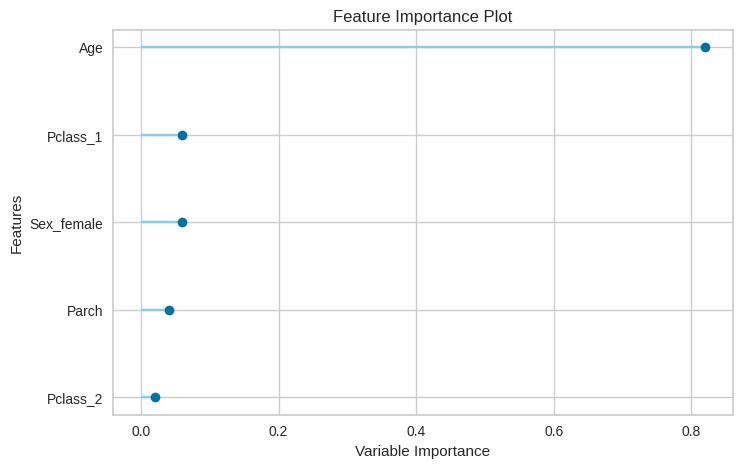

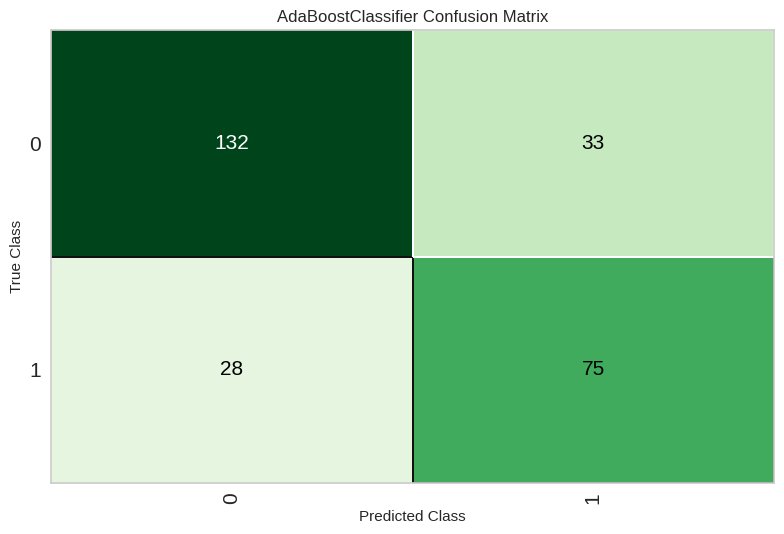

In [8]:
# Analisando o modelo
plot_model(best, plot='feature')
plot_model(best, plot='confusion_matrix')

# Você pode substituir o parâmetro do plot por 'confusion_matrix', 'auc', 'feature'...
# help(plot_model) para mais plots disponíveis

### Realizando a predição dos dados para validar nosso modelo

In [9]:
predictions = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7724,0.8128,0.7282,0.6944,0.7109,0.5234,0.5238


In [10]:
predictions.head(len(predictions))

# Comos podemos ver, a predição não é perfeita.
# Trocando alguns parâmetros e ajeitando melhor o modelo,
# é possível melhorar nossa precisão e acurácia. 

# Contudo, é incrível a facilidade de se fazer um código
# de Machine Learning com o PyCaret.

,Age,Parch,Sex_female,Pclass_1,Pclass_2,Survived,prediction_label,prediction_score
474,22.0,0,1,0,0,0,1,0.5045
583,36.0,0,0,1,0,0,1,0.5027
850,4.0,2,0,0,0,0,0,0.5054
214,NaN,0,0,0,0,0,0,0.5142
246,25.0,0,1,0,0,0,1,0.5052
...,...,...,...,...,...,...,...,...
449,52.0,0,0,1,0,1,0,0.5013
422,29.0,0,0,0,0,0,0,0.5104
848,28.0,1,0,0,1,0,0,0.5057
888,NaN,2,1,0,0,0,0,0.5018


### Finalizando e salvando o modelo

In [11]:
# Essa função finaliza o modelo, ou seja,
# usa os dados de validação para treinar o modelo.

model = finalize_model(best)

In [12]:
# Após finalizar, podemos salvar o modelo

save_model(best, "titanic_survival")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Parch', 'Sex_female',
                                              'Pclass_1', 'Pclass_2'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  Tr...=None, include=[],
                                     transformer=S

### Fazendo a previsão dos dados de teste

In [13]:
prediction = predict_model(model, data=test_data)

In [14]:
# Criamos o arquivo de submissão para a competição no Kaggle
submission = pd.DataFrame({'PassengerId': test_data.PassengerId, 
                           'Survived': prediction['prediction_label']})

submission.head(len(submission))

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [15]:
# Salvamos esse arquivo
submission.to_csv("./data/titanic/submission.csv", index=False)

# Essa previsão, feita sem muito conhecimento, usando o PyCaret
# retorna um score de 75% na competição.

# Conclusão

O PyCaret é um framework que pode ser usado em qualquer nível de conhecimento sobre Machine Learning, seja básico ou avançado. Ele é uma poderosa ferramenta, principalmente com sua "melhor arma", a função de comparar modelos. Essa função poupa horas e horas de código para conseguir o melhor modelo para o seu conjunto de dados. Além disso, o PyCaret é uma ferramenta de Auto ML, ou seja, ela automaticamente trata os dados e compara todos os modelos de Machine Learning de forma Low Code. 

No entanto, o PyCaret pode ser um framework difícil de usar para se aprofundar no mundo do Machine Learning, devido sua baixa complexidade. Sem ter conhecimento, você não sabe o que está acontecendo e fica refém de ficar mudando parâmetros aleatórios para tentar melhorar o desempenho do seu modelo. Além disso, o PyCaret tem várias limitações quanto ao uso da GPU no treinamento do modelo. É preciso instalar a biblioteca do modelo, caso o modelo possa usar a GPU, para poder treiná-lo usando sua GPU.

No mais, o PyCaret com certeza vai ser uma ferramenta útil durante toda minha graduação. Vai me ajudar muito quando eu estiver em dúvida de qual modelo é melhor para algum conjunto de dados... É só rodar a função e esperar algumas dezenas de horas (dependendo da quantidade de dados)...

Em nossa pesquisa sobre energia elétrica, quando rodamos a função compare_models do PyCaret, ele retornou modelos não sazonais (quando a gente pensava que nossos dados eram sazonais). Com estudo, e fazendo a análise correta, eu descobri recentemente que nossos dados não eram sazonais (o que me surpreendeu). Ou seja, o PyCaret previu esse fator primeiro que a gente. Auto ML é lindo, não é?